<a href="https://colab.research.google.com/github/HasanFil/TASK/blob/main/TASK_3B.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data_all = pd.read_csv("MRI_and_CDRinfo_Values_X_train.csv")
data_labels = pd.read_csv("CDR_Values_y_train.csv")

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:3326: DtypeWarning: Columns (22,24,41,46,48,51,90,91,92,93,94,95,96,97,98,99,100,167,205,208,210,213,216,219,221,223,225,227,229,231,235,237,239,241,243,245,247,249,251,253,255,365,380,382,384,402,404,406,551,634,651,654,659,689,770,776,900,908,943,946,964,965,974,1176) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [3]:
data_all

,Unnamed: 0,Unnamed: 0.1,index_x,NACCID_x,NACCADC_x,PACKET,FORMVER,VISITMO,VISITDAY,VISITYR,...,RSUPPARM,RSUPTEM,RSUPTEMM,RSUPMAR,RSUPMARM,RTRTEM,RTRTEMM,NACCNMRI_y,NACCVNUM_y,original_ind_y
0,1970,1970,116428,NACC831508,6518,I,1.0,5,23,2007,...,0.9674,9.7215,2.1089,5.2785,1.1998,0.3315,0.3810,1,1,5342
1,1146,1146,110463,NACC719761,6499,I,2.0,9,24,2010,...,1.5867,15.1130,2.1134,12.2880,1.8935,0.9070,1.8444,1,1,7855
2,675,675,106548,NACC979197,6061,F,2.0,7,18,2012,...,1.2816,14.1317,2.2958,6.9755,1.7738,0.7716,1.5066,3,3,1948
3,1268,1268,111371,NACC917131,6499,I,2.0,2,21,2013,...,1.6097,16.3510,2.0591,9.3860,1.7700,1.2190,1.9347,1,1,8348
4,2323,2323,161286,NACC056098,9661,F,2.0,1,8,2015,...,1.7000,13.7700,2.1000,11.1200,2.1400,1.3100,1.5200,1,8,28
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1583,984,984,109131,NACC467810,6499,I,2.0,9,12,2012,...,1.8563,17.1000,2.3453,10.5410,1.8922,0.6160,1.1062,2,1,8268
1584,1325,1325,111836,NACC015713,6518,I,2.0,7,23,2008,...,1.0263,11.3599,1.6028,5.7364,1.7879,0.4821,0.5913,3,1,4835
1585,788,788,107627,NACC172271,6499,I,2.0,2,11,2010,...,1.3898,13.0690,2.0945,8.0590,1.8262,0.7670,1.5666,1,1,7782
1586,195,195,33729,NACC692052,2096,I,1.0,4,13,2006,...,1.7100,15.8200,1.7800,6.5300,1.8600,0.8000,1.4700,1,1,1797


In [4]:
data_labels

,Unnamed: 0,CDRGLOB
0,1970,0
1,1146,0
2,675,0
3,1268,2
4,2323,0
...,...,...
1583,984,1
1584,1325,1
1585,788,2
1586,195,1


In [5]:
data_labels["HIP_VOL"] = data_all["HIPPOVOL"]

In [6]:
data_labels

,Unnamed: 0,CDRGLOB,HIP_VOL
0,1970,0,5.1960
1,1146,0,6.8940
2,675,0,6.2860
3,1268,2,5.5890
4,2323,0,7.4100
...,...,...,...
1583,984,1,7.9400
1584,1325,1,5.3273
1585,788,2,6.5270
1586,195,1,5.3400


In [25]:
data_labels[data_labels["CDRGLOB"]==0].iloc[:,2].mean()        
data_labels[data_labels["CDRGLOB"]==1].iloc[:,2].mean()      
data_labels[data_labels["CDRGLOB"]==2].iloc[:,2].mean()        
data_labels[data_labels["CDRGLOB"]==3].iloc[:,2].mean()  
data_mean = data_labels.groupby('CDRGLOB')[['HIP_VOL']].mean()
data_mean

,HIP_VOL
CDRGLOB,
0,6.304869
1,5.839063
2,5.323365
3,4.965071


In [26]:
data_labels[data_labels["CDRGLOB"]==0].iloc[:,2].std()        
data_labels[data_labels["CDRGLOB"]==1].iloc[:,2].std()      
data_labels[data_labels["CDRGLOB"]==2].iloc[:,2].std()        
data_labels[data_labels["CDRGLOB"]==3].iloc[:,2].std()  
data_std = data_labels.groupby('CDRGLOB')[['HIP_VOL']].std()
data_std

,HIP_VOL
CDRGLOB,
0,0.757105
1,0.866157
2,0.974990
3,1.031115


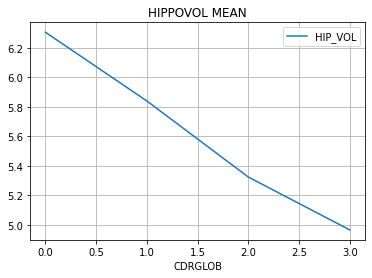

In [51]:
data_mean.plot(kind='line', grid=True, title="HIPPOVOL MEAN",legend=True)

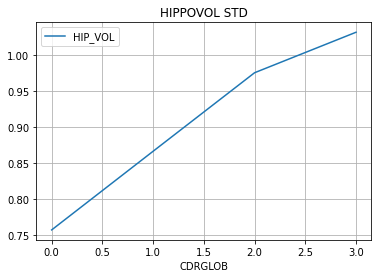

In [45]:
data_std.plot(kind='line', grid=True, title="HIPPOVOL STD",legend=True)

In [58]:
data_std=data_labels['HIP_VOL'].std()
data_mean=data_labels["HIP_VOL"].mean()

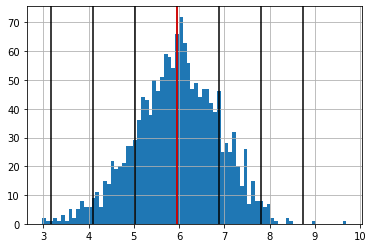

In [63]:
data_labels["HIP_VOL"].hist(bins=80)
plt.axvline((data_mean + (3*data_std)), color='black')
plt.axvline((data_mean + (2*data_std)), color='black')
plt.axvline((data_mean + (1*data_std)), color='black')
plt.axvline((data_mean + (0*data_std)), color='black')
plt.axvline((data_mean - (1*data_std)), color='black')
plt.axvline((data_mean - (2*data_std)), color='black')
plt.axvline((data_mean - (3*data_std)), color='black')
plt.axvline(data_mean,color="red")